# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Nils\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


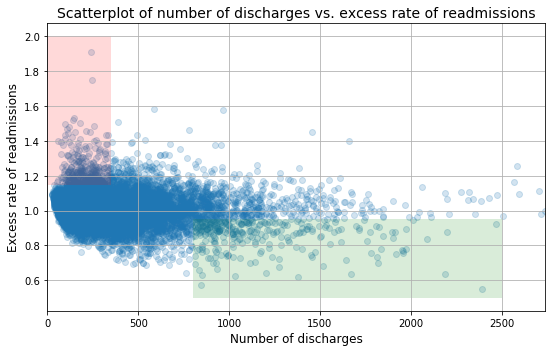

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

___
## A: Do you agree with the above analysis and recommendations? Why or why not?
Firstly,  the analysis itself is poorly performed. The cleaning only removes rows based on NaN values in the 'number of discharges' column and does so in an error-prone way. Furthermore, the first 81 and last 2 observations are excluded from the scatterplot without justification.

As for the conclusions of the report, they are largely unsupported due to the lack of any hypothesis testing. The report author asserts a significant correlation between excess readmission rate and number of discharges, but does not perform a Pearson correlation test, or even a linear regression, to provide evidence for this assertion.

Furthermore, it is misleading to highlight specific areas of the scatterplot to try to make a point about the overall correlation, especially when the highlighted areas are relatively low in density of data points. To draw a conclusion about a correlation, all data must be taken into account.

When comparing the extremes of number of discharges (hospitals with < 100 and > 1000 discharges), the author supplies information about each group, but then leaves the reader to draw conclusions on their own, which is potentially misleading. Hypothesis testing needs to be performed here.

The first of the policy recommendations is absurd, since it is using a metric (number of discharges) that is a weak predictor - at best - of excess readmission rate to assign hospitals to mandatory demonstration of investment into improved quality of care. There is no reason to use discharge number to make this determination, rather than just using excess readmission rate.

The second of the recommendations is unfounded, because it depends on the statistical conclusions of the report, and no hypothesis testing has been done to support these conclusions.
___

___
## B: 
___

In [6]:
# inspect dataset
print(hospital_read_df.info())
hospital_read_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB
None


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [7]:
#clean the data
clean_df = hospital_read_df.copy()
clean_df['Number of Discharges'] = pd.to_numeric(clean_df['Number of Discharges'], errors='coerce')
clean_df.dropna(inplace=True, subset=['Number of Discharges', 'Excess Readmission Ratio'], how='any')
del clean_df['Footnote']
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.1+ MB


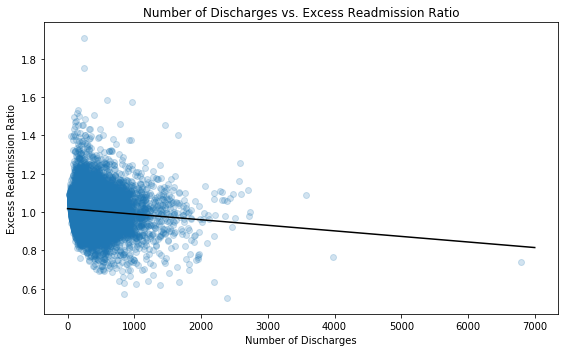

In [11]:
# compute linear regression
a, b = np.polyfit(clean_df['Number of Discharges'], clean_df['Excess Readmission Ratio'], 1)
regression_x = np.array([0, 7000], dtype='float64')
regression_y = a * regression_x + b

# display scatterplot of number of discharges vs excess readmission rate, with regression line
plt.subplots(figsize=(8,5))
plt.scatter(clean_df['Number of Discharges'], clean_df['Excess Readmission Ratio'], alpha=0.2)
plt.plot(regression_x, regression_y, color='black')

plt.title('Number of Discharges vs. Excess Readmission Ratio')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.tight_layout()

___
The linear regression shows a downward trend of lower excess readmission ratio for larger number of discharges. However, this is not sufficient to conclude a correlation. We need to calculate the Pearson correlation coefficient and its p-value.

The null hypothesis is that there is no correlation between the two values.
___

In [15]:
# compute Pearson correlation coefficient and its p-value
from scipy.stats import pearsonr

r, p = pearsonr(clean_df['Number of Discharges'], clean_df['Excess Readmission Ratio'])
print('Correlation coefficient: ', r, '\nCoefficient of determination: ', r**2,'\np-value: ', p)

Correlation coefficient:  -0.09739794351079355 
Coefficient of determination:  0.009486359400131731 
p-value:  1.222547377680967e-25


___
There is, in fact, a statistically significant correlation between number of discharges and excess readmission ratio. The p-value is far below a threshold of alpha=0.01 for rejecting the null hypothesis.

However, the correlation coefficient is rather low, at less than 0.1. The coefficient of determination indicates that less than 1% of the variation in excess readmission ratio is attributable to number of discharges. So while the correlation might be statistically significant, it is too weak to be practically meaningful. Furthermore, this is only a correlation, so we cannot conclude from this analysis that low hospital volume causes excess readmissions. Another possiblity is that hospitals with poor patient outcomes end up with smaller volumes because they develop a poor reputation among the public.

Therefore, I would not recommend using the size of hospitals as a metric for policymaking. This approach would be onerous to hospitals, and is unlikely to have any meaningful impact on hospital quality. Incentive programs to encourage the merging of low-volume hospitals could cost the government a large amount of money, while causing little if any benefit. Furthermore, a policy like this could have unintended negative consequences in the healthcare industry that outweigh any benefit to hospital quality. A far better approach would be to create policy based on a more direct measure of hospital quality, such as excess readmission ratio.
___